In [1]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from returnn_training_progress import get_epoch_data
%load_ext autoreload
%autoreload 2

In [28]:
files = {
    # "glowTTS/training": "GlowTTS Newbob",
    # "glowTTS/enc192/100ep/silence_preprocessed/training/": "GlowTTS warmup",
    "glowTTS/enc192/200ep/RAdam/lr1e-4/silence_preprocessed/training/": "GlowTTS RAdam 1e-4",
    "glowTTS/enc192/200ep/RAdam/lr1e-5/silence_preprocessed/training/": "GlowTTS RAdam 1e-5",
    "glowTTS/enc192/200ep/RAdam/lr1e-6/silence_preprocessed/training/": "GlowTTS RAdam 1e-6",
    # "glowTTS/enc192/200ep/long_cooldown/not_silence_preprocessed/training/": "192-channels encoder",
    # "glowTTS_nar_taco_encoder/not_silence_preprocessed/training/": "CNN+BLSTM encoder",
    # "asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training/": "Conformer ASR on GlowTTS Features",
    # "asr_dataset/no_spec_augment/glow_enc192_200ep_not_silence_preprocessed/training/": "GlowTTS 192 no spec aug",
    # "asr_dataset/spec_augment/no_glow/training/": "Conformer ASR Baseline",
    # "asr_dataset/no_spec_augment/no_glow/training/": "Conformer ASR Baseline no spec aug",
}

In [29]:
# root = "/u/lukas.rilling/experiments/glow_tts_asr/alias/experiments/librispeech/tts_architecture/glow_tts/pytorch/"
root = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/"
# root = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/"


In [30]:
lr_files = []
for f in files.keys():
    lr_files.append(f"{root}{f}/work/learning_rates")

In [34]:
# plot_lr = True
plot_lr = False

In [35]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data[(labels[i], ep)] = ep_data
        error_data[(labels[i], ep)].update(ep_data_error)
df = pd.DataFrame.from_dict(error_data, orient="index")
df


learning_rate  dev_loss_dp  dev_loss_mle        dp  \
GlowTTS RAdam 1e-4 1         0.000100     1.102437     -0.302897  1.119371   
                   2         0.000100     1.096485     -0.408221  1.092375   
                   3         0.000100     1.031065     -0.474628  1.076430   
                   4         0.000100     0.973345     -0.517772  1.037571   
                   5         0.000100     1.020423     -0.536728  1.001077   
...                               ...          ...           ...       ...   
GlowTTS RAdam 1e-6 96        0.000001     0.987307     -0.455626  1.022902   
                   97        0.000001     0.989513     -0.456239  1.022790   
                   98        0.000001     0.983719     -0.456885  1.021744   
                   99        0.000001     0.986747     -0.457867  1.021659   
                   100       0.000001     0.988943     -0.458591  1.020295   

                             mle  
GlowTTS RAdam 1e-4 1    0.009501  
                   2   -0.395298  
                   3   -0.462500  
                   4   -0.504926  
                   5   -0.537546  
...                          ...  
GlowTTS RAdam 1e-6 96  -0.455952  
                   97  -0.456588  
                   98  -0.457464  
                   99  -0.458206  
                   100 -0.458897  

[300 rows x 5 columns]

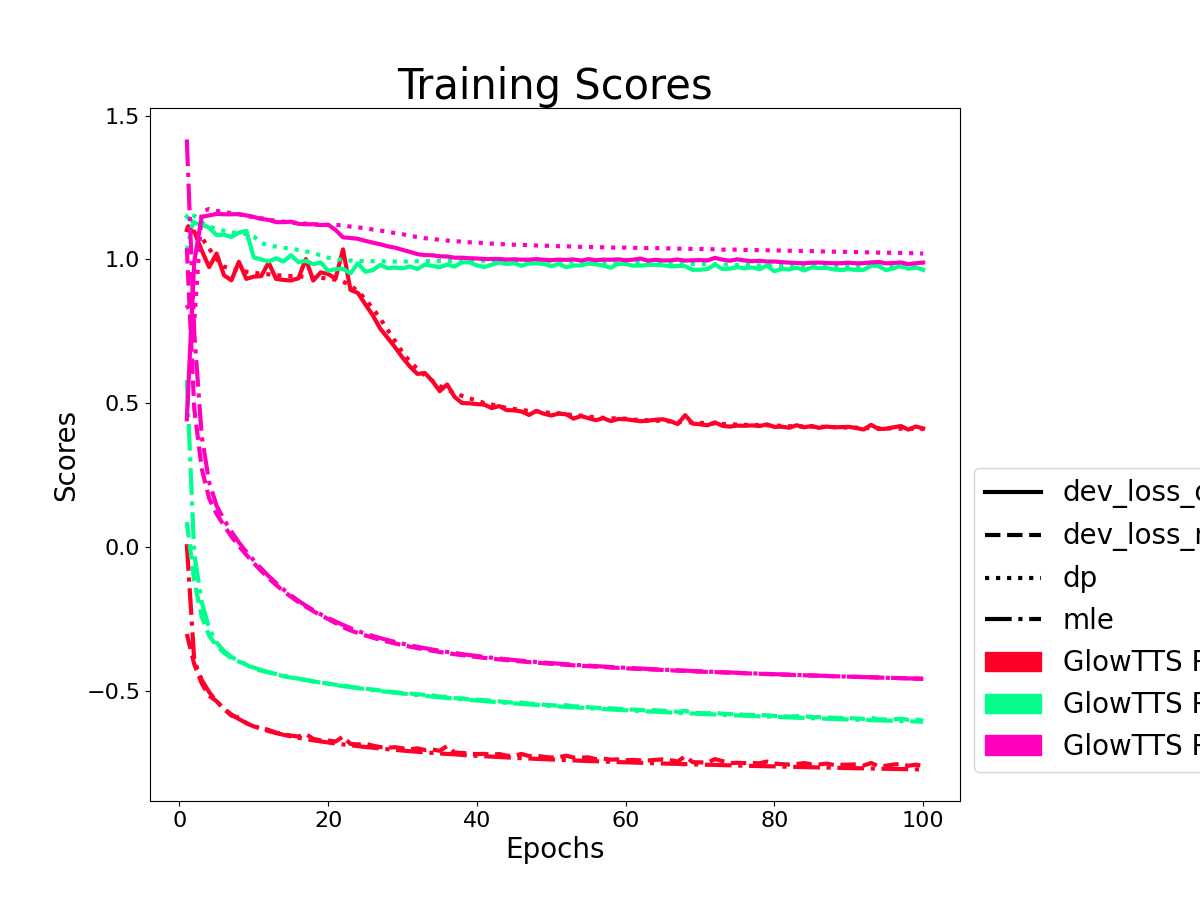

In [36]:
from returnn_training_plot import plot_df

# plot_df(df.drop(["mle", "dp"], axis=1), plot_lr, large_font=True, shrink_axes=0.8)
plot_df(df, plot_lr, large_font=True, shrink_axes=0.8)